In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

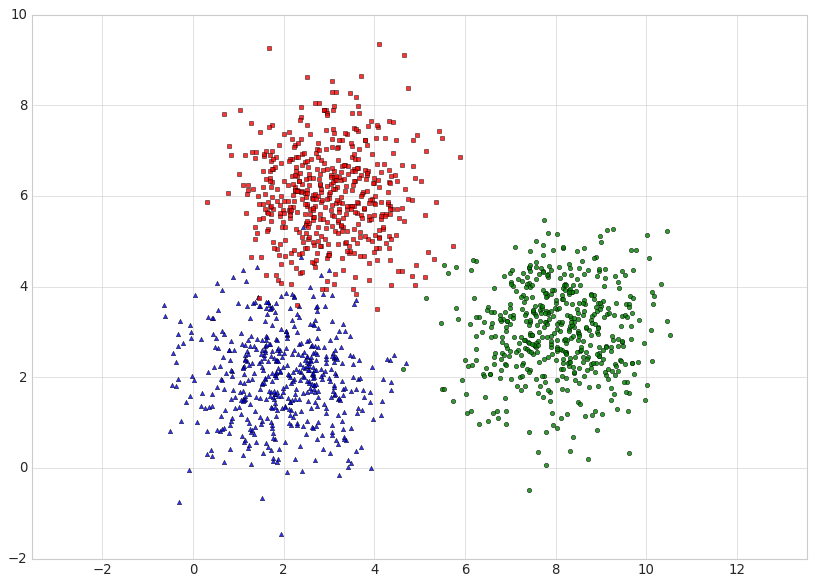

In [78]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    fig = plt.gcf()
    fig.set_size_inches(12.5, 8.5, forward=True)
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

#### Bài làm :

In [107]:
plt.style.use('bmh');
from matplotlib.pyplot import figure;
figure(figsize=(18, 16), dpi=80);

<Figure size 1440x1280 with 0 Axes>

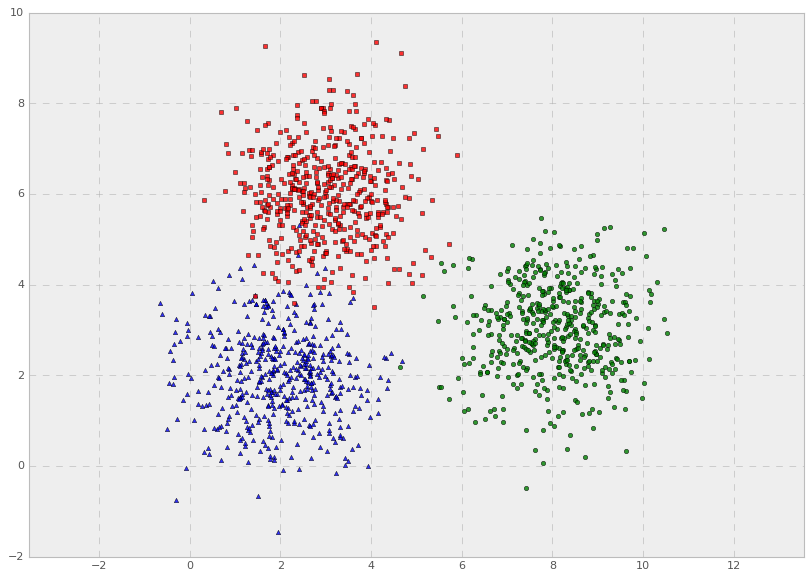

In [108]:
kmeans_display(X, original_label)

## Khởi tạo cụm 

In [52]:
X

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

In [53]:
def k_cen(X, cluster_nums):
    return X[np.random.choice(X.shape[0], cluster_nums, replace=False)]

In [54]:
k_cen1 = k_cen(X, 3)

In [55]:
k_cen1

array([[4.11493298, 5.07686104],
       [1.65886291, 5.86053474],
       [2.19820503, 1.91384463]])

## Tính toán và xác định phần tử thuộc cụm

In [56]:
def cen_cal(X, centers):
    distance11 = cdist(X, centers)
    return np.argmin(distance11, axis = 1)

In [57]:
cen_cal(X, k_cen1)

array([2, 2, 2, ..., 1, 0, 1])

## Cập nhật lại label

In [115]:
def update_kmeans(X, labels, cluster_nums):
    centers = np.zeros((cluster_nums, X.shape[1]))
    for k in range(cluster_nums):
        new_k = X[labels == k, :]
        centers[k,:] = np.mean(new_k, axis = 0)
    return centers

In [116]:
k_cen2 = update_kmeans(X, original_label, 3)

In [64]:
k_cen1

array([[4.11493298, 5.07686104],
       [1.65886291, 5.86053474],
       [2.19820503, 1.91384463]])

In [63]:
k_cen2

array([[1.9714095 , 2.01465971],
       [8.0342567 , 3.01928414],
       [2.99115865, 6.02422406]])

## Kiểm tra điều kiện dừng:

In [70]:
def kmeans_check(cen_1, cen_2):
    return np.array_equal(cen_1, cen_2)

In [71]:
kmeans_check(k_cen1, k_cen2)

False

## Visualization

In [153]:
def kmeans_vis(X, centers, labels, cluster_nums):
    fig = plt.gcf()
    fig.set_size_inches(12.5, 8.5, forward=True)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt_colors = ['#ff3838', '#ffac26', '#ccff26', '#26ff4a', '#26ffb7', '#26acff', '#0400ff', '#ff00dd', '#ff003c', '#59594c']
 
    for i in range(cluster_nums):
        data = X[labels == i]
        plt.scatter(data[:, 0], data[:, 1], color = plt_colors[i])
    plt.show()

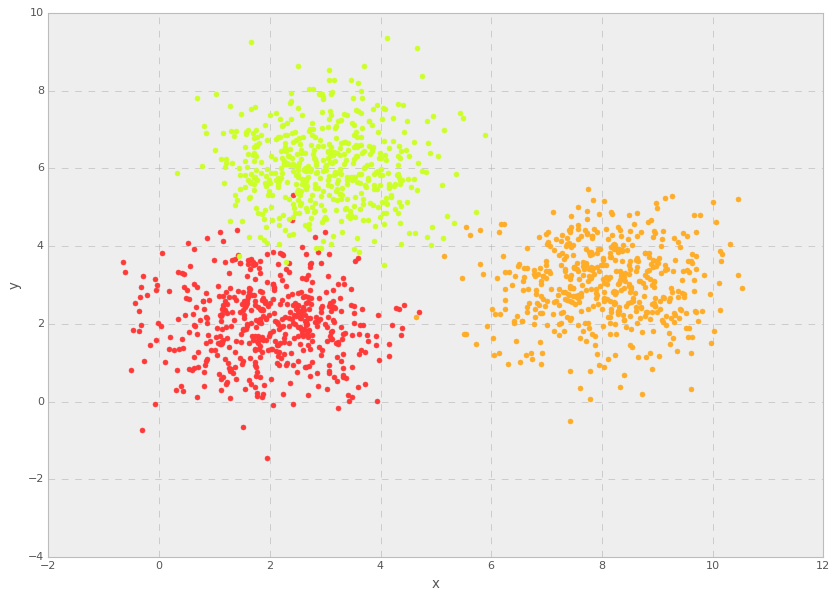

In [154]:
kmeans_vis(X, k_cen1, original_label, 3)

## K-means algo

In [155]:
def kmeans(init_centes, X, cluster_nums):
    centers = init_centes
    init_labels = np.zeros(X.shape[0])
    kmeans_vis(X, centers, init_labels, cluster_nums)
    while True:
        labels = cen_cal(X, centers)
        #kmeans_vis(X, centers, labels, cluster_nums)
        new_centers = update_kmeans(X, labels, cluster_nums)
        if kmeans_check(centers, new_centers):
            break
        centers = new_centers
    kmeans_vis(X, centers, labels, cluster_nums)
    return (centers, labels)

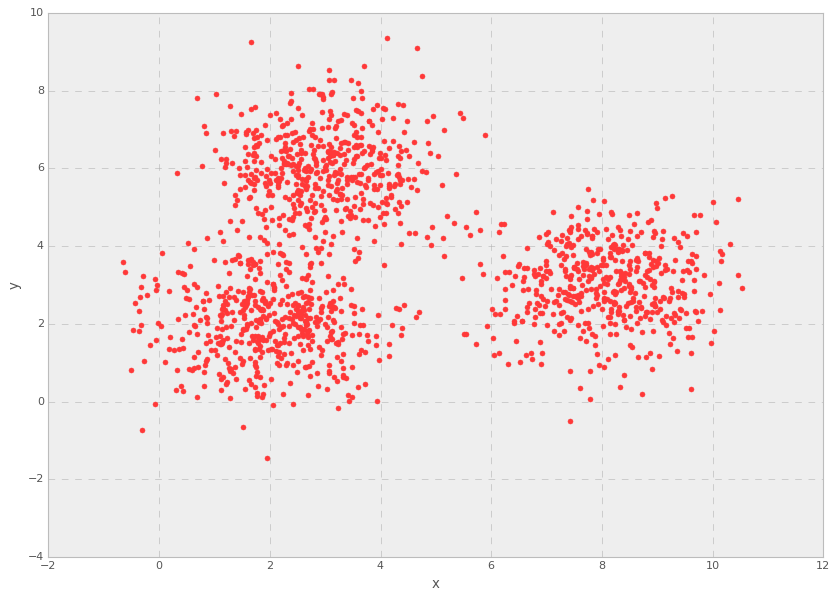

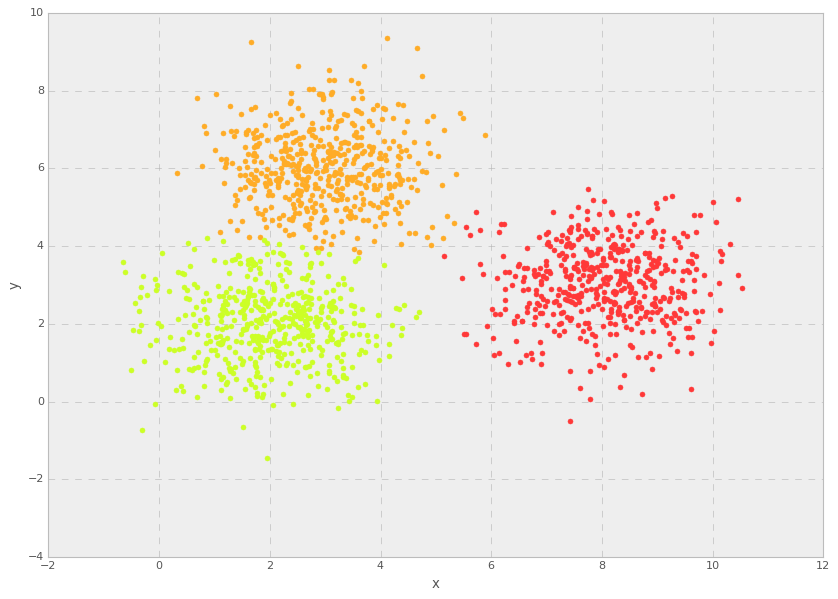

In [156]:
kmeans(k_cen1, X, 3);

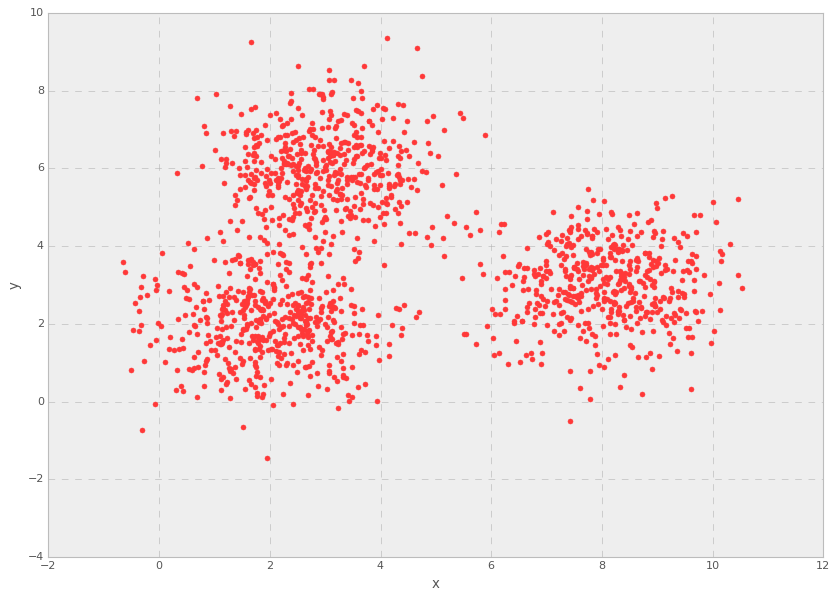

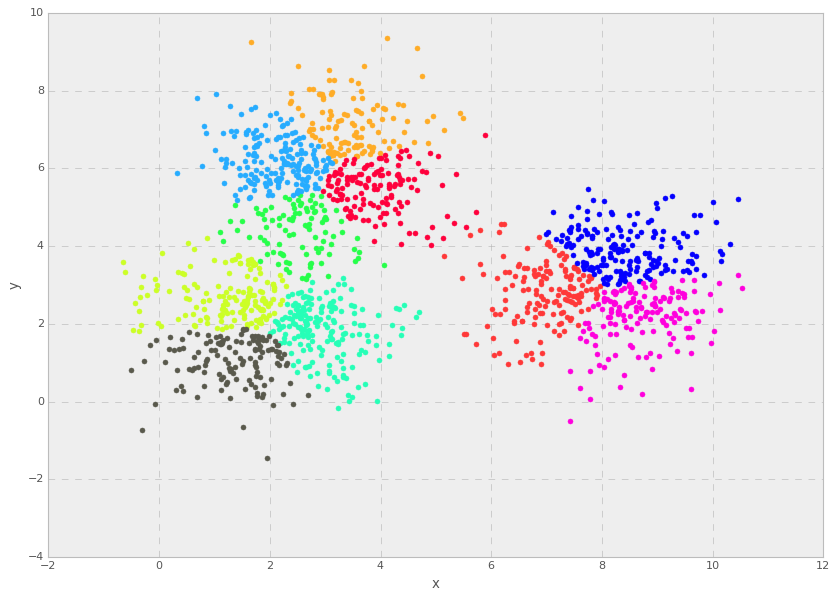

In [160]:
k_cen2 = k_cen(X, 10)
kmeans(k_cen2, X, 10);